In [1]:
import pathlib
import dill
import pickle
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
path = pathlib.Path('exp_results')
files = list(path.glob("*.dill"))

In [3]:
def parse_file(f):
    split_name = f.name.split("_")
    noise = float(split_name[1])
    dt = float(split_name[-1][:-5])
    with open(f,'rb') as path:
        result = pickle.load(path)
    d = result['coeff_mets']
    d.update(result['data_mets'])
    d['noise'] = np.around(np.array(noise),3)
    d['dt'] = np.around(np.array(dt),3)
    return d

In [4]:
results = [parse_file(f) for f in files]

In [5]:
df = pd.DataFrame(results)
df = df.astype('float')

In [6]:
df

,precision,recall,f1,coeff_rel_l2,coeff_rmse,coeff_mae,mse,rmse,mae,max_abs_error,normalized_mse,relative_l2_error,noise,dt
0,0.250000,1.000000,0.400000,1.073452e+01,61.793016,2.988027e+01,3.173064e+04,178.130967,97.816276,1146.462786,8.156254e+00,2.855460e+00,20.0,0.20
1,0.583333,1.000000,0.736842,4.691552e-01,2.700682,6.916857e-01,3.224390e+01,5.678371,4.504044,19.759321,8.288185e-03,9.102495e-02,8.0,0.14
2,1.000000,1.000000,1.000000,4.512211e-07,0.000003,7.959694e-07,1.390676e-09,0.000037,0.000027,0.000146,3.574686e-13,5.977915e-07,0.0,0.10
3,0.250000,0.857143,0.387097,2.740339e+00,15.774700,9.047678e+00,2.907179e+04,170.504530,86.674476,1267.369250,7.472806e+00,2.733208e+00,18.0,0.10
4,0.750000,0.857143,0.800000,3.681728e-01,2.119378,7.193706e-01,1.197427e+02,10.942699,7.545862,62.889303,3.077945e-02,1.754127e-01,20.0,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.700000,1.000000,0.823529,1.400531e-01,0.806213,2.586310e-01,4.064425e+01,6.375284,4.516068,27.290693,1.044747e-02,1.021966e-01,18.0,0.04
106,0.411765,1.000000,0.583333,1.770579e+00,10.192298,3.872042e+00,1.088948e+03,32.999207,25.564900,137.795666,2.799103e-01,5.289812e-01,6.0,0.20
107,1.000000,1.000000,1.000000,4.179963e-07,0.000002,7.105534e-07,2.190678e-10,0.000015,0.000010,0.000104,5.631063e-14,2.372608e-07,0.0,0.12
108,0.233333,1.000000,0.378378,4.108555e+00,23.650808,1.832125e+01,1.559428e+07,3948.959893,2302.264346,22689.643477,4.008458e+03,6.330229e+01,16.0,0.12


<Axes: xlabel='noise', ylabel='dt'>

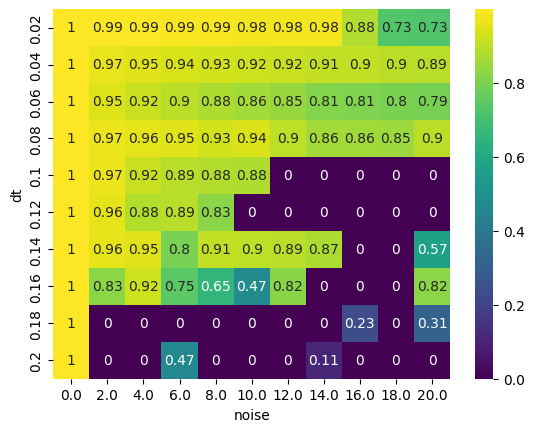

In [7]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='relative_l2_error')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

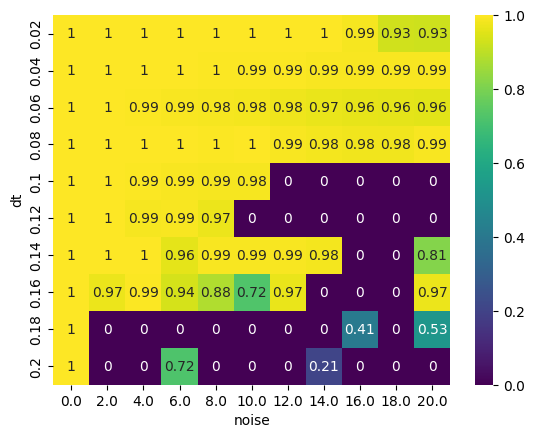

In [8]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='normalized_mse')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

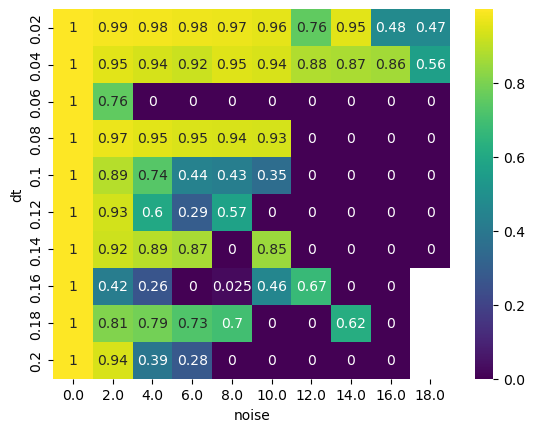

: 

In [ ]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='coeff_rel_l2')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")
